In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
import seaborn as sns
import datetime

In [26]:
df_incident = pd.read_csv('../data/Raw_Data_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
list(df_incident.columns)

['PdId',
 'IncidntNum',
 'Incident Code',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'location',
 'SF Find Neighborhoods 2 2',
 'Current Police Districts 2 2',
 'Current Supervisor Districts 2 2',
 'Analysis Neighborhoods 2 2',
 'DELETE - Fire Prevention Districts 2 2',
 'DELETE - Police Districts 2 2',
 'DELETE - Supervisor Districts 2 2',
 'DELETE - Zip Codes 2 2',
 'DELETE - Neighborhoods 2 2',
 'DELETE - 2017 Fix It Zones 2 2',
 'Civic Center Harm Reduction Project Boundary 2 2',
 'Fix It Zones as of 2017-11-06  2 2',
 'DELETE - HSOC Zones 2 2',
 'Fix It Zones as of 2018-02-07 2 2',
 'CBD, BID and GBD Boundaries as of 2017 2 2',
 'Areas of Vulnerability, 2016 2 2',
 'Central Market/Tenderloin Boundary 2 2',
 'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
 'HSOC Zones as of 2018-06-05 2 2',
 'OWED Public Spaces 2 2',
 'Neighborhoods 2']

In [27]:
df_incident = df_incident.drop(df_incident.columns[14:], axis=1)
df_incident['Date'] = pd.to_datetime(df_incident['Date'])
df_incident['Year'] = df_incident['Date'].dt.year

df_incident

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,Year
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,2004-02-15,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),2004
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,2013-03-14,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421595,37.770767,POINT (-122.421594519119 37.7707674171464),2013
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,2013-10-08,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367,37.769868,POINT (-122.422367409563 37.7698682392455),2013
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,2004-08-29,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452717,37.745745,POINT (-122.452716700987 37.7457451434135),2004
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,2005-07-29,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127,37.712164,POINT (-122.448127287476 37.7121636146229),2005
5,13085582009320,130855820,9320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,2013-10-08,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446613,37.782246,POINT (-122.44661297883898 37.7822458223917),2013
6,11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,2011-11-13,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388457,37.742983,POINT (-122.388456834121 37.7429830266541),2011
7,5116515606241,51165156,6241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,2005-10-15,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874,37.785247,POINT (-122.439874051516 37.7852471617589),2005
8,5099200968020,50992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,2005-09-03,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469265,37.759216,POINT (-122.469264894685 37.7592163037102),2005
9,9118446702004,91184467,2004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,2009-11-16,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999,37.786277,POINT (-122.412999075009 37.786277459166),2009


In [28]:
df_incident = df_incident[df_incident['Year']<2018]
df_incident.drop_duplicates(inplace=True)
df_incident.dropna(inplace=True)
df_incident.shape

(2115111, 15)

In [40]:
df_incident_yearly_sums = df_incident.groupby('Year')[['Category']].agg('count')
df_incident_yearly_sums

,PdId
Year,
2003,145073
2004,144323
2005,138807
2006,133726
2007,133601
2008,137113
2009,136218
2010,129750
2011,128563


In [36]:
incident_years = np.array(df_incident_yearly_sums.index)
incident_count = np.array(df_incident_yearly_sums['Category'])
print(incident_count)
print(incident_years)

[145073 144323 138807 133726 133601 137113 136218 129750 128563 137334
 149639 147056 153771 148378 151759]
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]


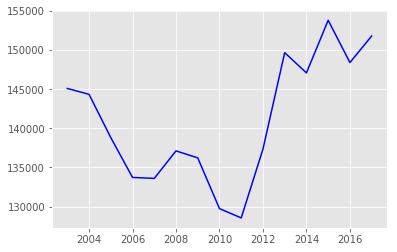

In [34]:
# plt.figure(figsize=(12, 10))
plt.plot(incident_years, incident_count, 'b-')
plt.show()

In [43]:
df_incident_yearly_category_sums = df_incident.groupby(['Category'])[['PdId']].agg('count')
df_incident_yearly_category_sums

,PdId
Category,
ARSON,3778
ASSAULT,186818
BAD CHECKS,915
BRIBERY,779
BURGLARY,88971
DISORDERLY CONDUCT,9838
DRIVING UNDER THE INFLUENCE,5560
DRUG/NARCOTIC,116406
DRUNKENNESS,9676


In [57]:
violent_crimes = ['ARSON','ASSAULT', 'EXTORTION', 'KIDNAPPING', 'ROBBERY', 'SEX OFFENSES, FORCIBLE']
df_incident['Crime Type'] = df_incident['Category'].apply(lambda x: 'Violent' if x in violent_crimes else 'Non-Violent')

df_incident_violent = df_incident[df_incident['Crime Type'] == 'Violent']
df_incident_non_violent = df_incident[df_incident['Crime Type'] == 'Non-Violent']

print(df_incident_violent.shape)
print(df_incident_non_violent.shape)

(260201, 16)
(1854910, 16)


[17503 17065 15996 17339 17320 17812 16971 16665 16551 17067 17936 17136
 18255 18195 18390]
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]


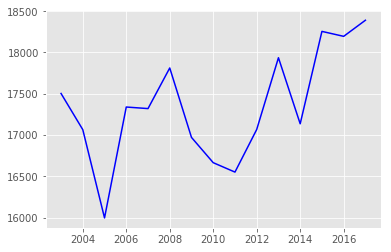

In [58]:
df_incident_yearly_sums_violent = df_incident_violent.groupby('Year')[['Category']].agg('count')

incident_years = np.array(df_incident_yearly_sums_violent.index)
incident_count = np.array(df_incident_yearly_sums_violent['Category'])
print(incident_count)
print(incident_years)

plt.plot(incident_years, incident_count, 'b-')
plt.show()

[127570 127258 122811 116387 116281 119301 119247 113085 112012 120267
 131703 129920 135516 130183 133369]
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]


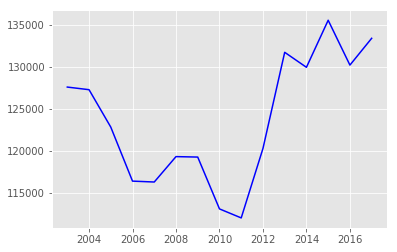

In [60]:
df_incident_yearly_sums_non_violent = df_incident_non_violent.groupby('Year')[['Category']].agg('count')

incident_years = np.array(df_incident_yearly_sums_non_violent.index)
incident_count = np.array(df_incident_yearly_sums_non_violent['Category'])
print(incident_count)
print(incident_years)

plt.plot(incident_years, incident_count, 'b-')
plt.show()

Scaling required, these values are to different to compare as they are